**Install Packages**

In [1]:
!git clone https://github.com/fizyr/keras-retinanet

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 5862, done.
remote: Total 5862 (delta 0), reused 0 (delta 0), pack-reused 5862
Receiving objects: 100% (5862/5862), 13.40 MiB | 1.95 MiB/s, done.
Resolving deltas: 100% (3948/3948), done.


In [2]:
%cd keras-retinanet
!pip install .
!python setup.py build_ext --inplace

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170784 sha256=bae457a5d8ca19c17fcef5669021d67c14318ac8b205614ab1250837f58f1c05
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13346 sha256=833f8bd471ba1cb48cb52d16837d1f9b8e1bcdbf4ca235862ba144fbdafea2e9
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-retinanet keras-resnet
running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/k

In [3]:
!pip install PyPDF2

     |████████████████████████████████| 81kB 4.4MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp36-none-any.whl size=61086 sha256=3df209d6ccae1e3d1d2e28785d5f963bdc4683824607d1e5fbe3c4664ef9fb9b
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [4]:
#https://buildmedia.readthedocs.org/media/pdf/camelot-py/latest/camelot-py.pdf
!apt install python-tk ghostscript

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-tk is already the newest version (2.7.17-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono gsfonts libcupsfilters1 libcupsimage2
  libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto ghostscript-x poppler-utils fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
0 upgraded, 11 newly installed, 0 to remove and 35 not upgraded.
Need to get 14.1 MB of archives.
After this operation, 

In [5]:
!pip install camelot-py[cv]

     |████████████████████████████████| 51kB 3.8MB/s 
     |████████████████████████████████| 5.6MB 7.1MB/s 
     |████████████████████████████████| 13.7MB 236kB/s 


In [6]:
!pip install pdf2image
!apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.10 [154 kB]
Fetched 154 kB in 0s (2,062 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 145529 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.10_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.10) ...
Setting up poppler-utils (0.62.0-2ubuntu2.10) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


**Get Weight and Labels**

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**Import the necessary packages**

In [8]:
from keras_retinanet.utils.image import preprocess_image
from keras_retinanet.utils.image import read_image_bgr
from keras_retinanet.utils.image import resize_image
from keras_retinanet import models

from pdf2image import convert_from_path
import matplotlib.pyplot as plt
from PyPDF2 import PdfFileWriter, PdfFileReader

import numpy as np
import cv2
import camelot
import copy

**Load Label and Weight**

In [9]:
# load the class label mappings
#model for headers
#labels = '/content/gdrive/My Drive/Colab Notebooks/retinanet_classes_RN3.csv'

#model for table
labels = '/content/gdrive/My Drive/Colab Notebooks/retinanet_classes.csv'

LABELS = open(labels).read().strip().split("\n")
print(LABELS)
LABELS = {int(L.split(",")[1]): L.split(",")[0] for L in LABELS}
print(LABELS)

['tabel,0']
{0: 'tabel'}


In [12]:
# load the weight from disk

#model for headers
#model_path = '/content/gdrive/My Drive/Colab Notebooks/output_RN3.h5'

#model for table
model_path = '/content/gdrive/My Drive/Colab Notebooks/output.h5'

model = models.load_model(model_path, backbone_name='resnet50')

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


**Functions**

In [11]:
def norm_pdf_page(pdf_file, pg):
    pdf_doc = PdfFileReader(open(pdf_file, "rb"))
    pdf_page = pdf_doc.getPage(pg-1)
    pdf_page.cropBox.upperLeft = (0, list(pdf_page.mediaBox)[-1])
    pdf_page.cropBox.lowerRight = (list(pdf_page.mediaBox)[-2], 0)
    return pdf_page

def pdf_page2img(pdf_file, pg, save_image=True):
    img_page = convert_from_path(pdf_file, first_page=pg, last_page=pg)[0]
    if save_image:
        img=pdf_file[:-4]+"-"+str(pg)+".jpg"
        img_page.save(img)
    return np.array(img_page), img

def img_dim(img, bbox):
    H_img,W_img,_=img.shape
    x1_img, y1_img, x2_img, y2_img=bbox
    w_table, h_table=x2_img-x1_img, y2_img-y1_img
    return [[x1_img, y1_img, x2_img, y2_img], [w_table, h_table], [H_img,W_img]]

def norm_bbox(img, bbox, x_corr=0.05, y_corr=0.05):
    [[x1_img, y1_img, x2_img, y2_img], [w_table, h_table], [H_img,W_img]]=img_dim(img, bbox)
    x1_img_norm,y1_img_norm,x2_img_norm,y2_img_norm=x1_img/W_img, y1_img/H_img, x2_img/W_img, y2_img/H_img
    w_img_norm, h_img_norm=w_table/W_img, h_table/H_img
    w_corr=w_img_norm*x_corr
    h_corr=h_img_norm*x_corr

    return [x1_img_norm-w_corr,y1_img_norm-h_corr/2,x2_img_norm+w_corr,y2_img_norm+2*h_corr]

def bboxes_pdf(img, pdf_page, bbox, save_cropped=False):
    W_pdf=float(pdf_page.cropBox.getLowerRight()[0])
    H_pdf=float(pdf_page.cropBox.getUpperLeft()[1])
    print(bbox)

    [x1_img_norm,y1_img_norm,x2_img_norm,y2_img_norm]=norm_bbox(img, bbox)
    x1, y1 = x1_img_norm*W_pdf, (1-y1_img_norm)*H_pdf
    x2, y2 = x2_img_norm*W_pdf, (1-y2_img_norm)*H_pdf
    
    if save_cropped:
        page=copy.copy(pdf_page)
        page.cropBox.upperLeft = (x1, y1)
        page.cropBox.lowerRight = (x2, y2)
        output = PdfFileWriter()
        output.addPage(page)

        with open(pdf_file[:-4]+"-"+str(pg)+".pdf", "wb") as out_f:
            output.write(out_f)

    return [x1, y1, x2, y2]
    
def detect_table(imgfname):
    image_path = imgfname
    image = read_image_bgr(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    output = image.copy()
    output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
    
    image = preprocess_image(image)
    (image, scale) = resize_image(image)
    image = np.expand_dims(image, axis=0)

    # detect objects in the input image and correct for the image scale

    (boxes, scores, labels) = model.predict_on_batch(image)
    boxes /= scale

    confidence = 0.2
    label_out = []

    # loop over the detections

    for (box, score, label) in zip(boxes[0], scores[0], labels[0]):

        # filter out weak detections

        if score < confidence:
            continue

        # convert the bounding box coordinates from floats to integers
        box = box.astype('int')

        # build the label and draw the label + bounding box on the output image
        labeli = label

        if LABELS[labeli] not in label_out:
          label_out.append(LABELS[labeli])
          print(box)

          return (box[0], box[1], box[2], box[3])	

**Import PDF File to extract the information**

In [13]:
# Upload PDF File
page = 1
PDF_PATH = '/content/RMA_sample.pdf'

In [14]:
img_page = convert_from_path(PDF_PATH, first_page=page, last_page=page+1, output_folder="/content/", fmt="jpg")
pdf_file = PDF_PATH
pg = page
img, imgfname = pdf_page2img(pdf_file, pg, save_image=True)

**Prediction using Keras RetinaNet**

(2339, 1654, 3)
tabel: 0.99
83
609
1527
1347


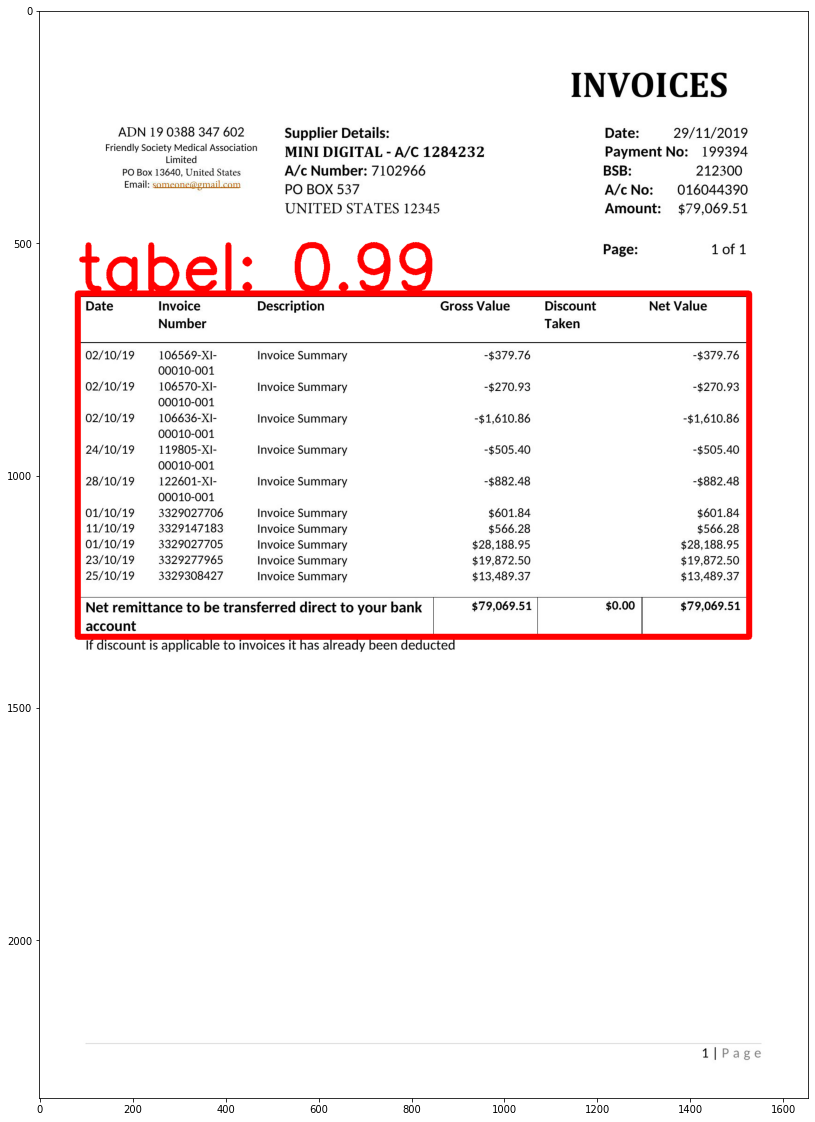

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image_path = imgfname
#image = cv2.imread(image_path)
image = read_image_bgr(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

output = image.copy()
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
print(output.shape) # row (height) x column (width) x color (3)

image = preprocess_image(image)
(image, scale) = resize_image(image)
image = np.expand_dims(image, axis=0)

# detect objects in the input image and correct for the image scale
(boxes, scores, labels) = model.predict_on_batch(image)
boxes /= scale

confidence =  0.2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
label_out = []
result = ""

# loop over the detections
for (box, score, label) in zip(boxes[0], scores[0], labels[0]):
	# filter out weak detections
	if score < confidence:
		continue

	# convert the bounding box coordinates from floats to integers
	box = box.astype("int")

	# build the label and draw the label + bounding box on the output
	# image
	labeli = label
	label = "{}: {:.2f}".format(LABELS[label], score)
	print(label)
	
	if LABELS[labeli] not in label_out:
	    label_out.append(LABELS[labeli])
	    cv2.rectangle(output, (box[0], box[1]), (box[2], box[3]), (255, 0, 0), 12)
	    print(box[0])
	    print(box[1])
	    print(box[2])
	    print(box[3])
	    #result 		 
	    cv2.putText(output, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 4.5, (255, 1, 1), 12)
     	    
plt.figure(figsize=(20, 20))
plt.imshow(output)
plt.show()

**Get Table**

In [16]:
pdf_page=norm_pdf_page(PDF_PATH, pg)

In [17]:
x1, y1, x2, y2 = detect_table(imgfname)
x1, y1, x2, y2

[  83  609 1527 1347]


(83, 609, 1527, 1347)

In [18]:
interesting_areas=[]

output = [[x1, y1, x2, y2]]
for x in output:
  [x1, y1, x2, y2] = bboxes_pdf(img, pdf_page, x)
  bbox_camelot = [
            ",".join([str(x1), str(y1), str(x2), str(y2)])
        ][0]  # x1,y1,x2,y2 where (x1, y1) -> left-top and (x2, y2) -> right-bottom in PDF coordinate space
        #print(bbox_camelot)
  interesting_areas.append(bbox_camelot)


print(interesting_areas)
output_camelot = camelot.read_pdf(
    filepath=pdf_file, pages=str(pg), flavor="stream", table_areas=interesting_areas
)

output_camelot[0].df

#output_camelot=[x.df for x in output_camelot]
#for i,db in enumerate(output_camelot):
#  db.to_excel(pdf_file[:-4]+"-"+str(pg)+"-table-"+str(i)+".xlsx")

[83, 609, 1527, 1347]
['3.8870858524788345,629.3373471569047,575.5766384522369,330.49704147071395']


,0,1,2,3,4,5,6
0,Date,Invoice,Description,Gross Value,Discount,,Net Value
1,,Number,,,Taken,,
2,02/10/19,106569-XI-,Invoice Summary,-$379.76,,,-$379.76
3,,00010-001,,,,,
4,02/10/19,106570-XI-,Invoice Summary,-$270.93,,,-$270.93
5,,00010-001,,,,,
6,02/10/19,106636-XI-,Invoice Summary,"-$1,610.86",,,"-$1,610.86"
7,,00010-001,,,,,
8,24/10/19,119805-XI-,Invoice Summary,-$505.40,,,-$505.40
9,,00010-001,,,,,
